Цели практической работы
Научиться проводить когортный анализ и оценивать удержание (retention) по количеству покупателей и по суммам заказов. 



Что нужно сделать
В этой практической работе используйте те же данные, которые были в видео.

Подготовьте данные: проверьте их на наличие пропусков. 
Постройте два когортных анализа в Jupyter Notebook:
для количества покупателей (user id);
для сумм их покупок.
Проанализируйте получившиеся графики и опишите результат. Что необычного вы заметили? Есть ли выбивающиеся когорты? У каких когорт лучшая возвращаемость клиентов, а у каких худшая? Что стоило бы ещё исследовать внимательнее на других данных?
 

Рекомендации по выполнению
Файл с результатами работы должен содержать аналогичные разделы файла из видео.



Что оценивается
Когортный анализ проведён корректно, в соответствии с заданием.
Файл содержит проверку на пропуски данных.
В файле есть матрицы значений когортного анализа для количества покупателей (user id) и для сумм их покупок. 
Матрицы retention выполнены с необходимым форматированием.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


In [16]:
df = pd.read_excel("Когортный анализ.xlsx")
df.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [17]:
df.isnull().sum()

user_id    0
date       0
price      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704840 entries, 0 to 704839
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  704840 non-null  object        
 1   date     704840 non-null  datetime64[ns]
 2   price    704840 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.1+ MB


In [19]:
df.describe()

,price
count,704840.000000
mean,81.403510
std,81.916181
min,20.000000
25%,40.000000
50%,50.000000
75%,100.000000
max,300.000000


In [20]:
def get_month(x):

    return dt.datetime(x.year, x.month, 1)

In [21]:
df['month_year'] = df['date'].apply(get_month)

In [22]:
df['cohortMonth'] = df.groupby('user_id')['month_year'].transform('min')

In [23]:
df.head(10)

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


In [24]:
def get_date(df, column):
    
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

In [25]:
date_year, date_month, _ = get_date(df, 'date')

In [26]:
cohort_year, cohort_month, _ = get_date(df, 'cohortMonth')

In [27]:
year_diff = date_year - cohort_year
month_diff = date_month - cohort_month
df['cohort_index'] = year_diff*12 + month_diff + 1
df.head()

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


In [28]:
df_pivot = df.pivot_table(
    index = 'cohortMonth',
    columns = 'cohort_index',
    values = 'user_id',
    aggfunc = len    
)

In [29]:
df_pivot.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN


In [30]:
first_column = df_pivot.iloc[:,0]

In [31]:
retention = df_pivot.div(first_column, axis=0)
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


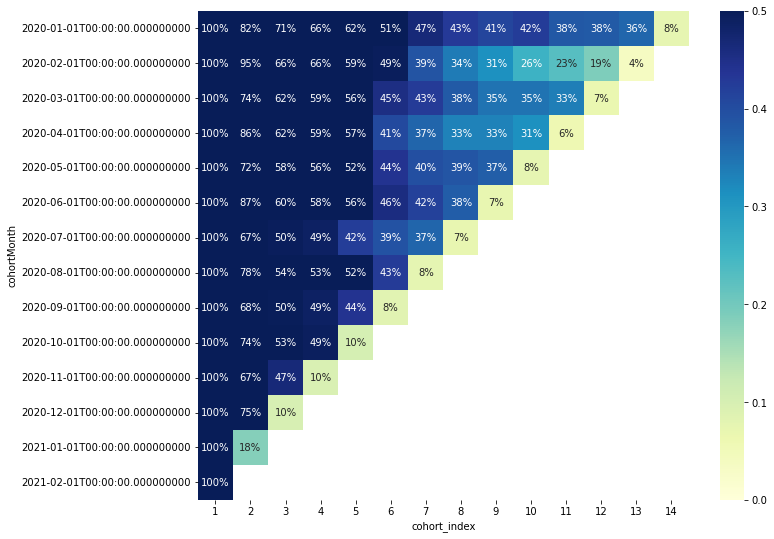

In [32]:
plt.figure(figsize=(11,9))
sns.heatmap(
    data=retention,
    annot=True,
    fmt='.0%',
    vmin=0.0,
    vmax=0.5, 
    cmap='YlGnBu'
)
plt.show()

In [36]:
df.user_id.value_counts()

XXJ049    641
XXE275    617
XXY248    617
XXV112    600
XXA188    594
         ... 
T5071       1
P3800       1
P3827       1
J4059       1
I4634       1
Name: user_id, Length: 23501, dtype: int64

In [37]:
df.user_id.nunique()

23501

1.Сегментация пользователей по дате первой покупки:

Разделите пользователей на когорты в зависимости от даты их первой покупки. Это позволит вам отслеживать поведение каждой когорты пользователей со временем.

2.Отслеживание поведения когорт во времени:

Изучите, как меняется активность и количество покупок в каждой когорте с течением времени после их первой покупки. Это позволит выявить тенденции и понять, как пользователи из разных когорт ведут себя в будущем.

3.Изучение влияния маркетинговых мероприятий:

Проанализируйте, какие маркетинговые мероприятия или изменения в продукте могли повлиять на поведение когорт. Это поможет определить успешность различных маркетинговых стратегий и их влияние на количество покупателей.

4.Использование метрик удержания и конверсии:

Оцените уровень удержания пользователей в каждой когорте и конверсию в повторные покупки. Эти метрики помогут понять, насколько успешно удается удерживать пользователей и стимулировать их к повторным покупкам.

5.Визуализация результатов:

Представьте результаты анализа в виде графиков, диаграмм и таблиц, чтобы наглядно продемонстрировать изменения в поведении когорт пользователей.

In [48]:
df['cohort_groups'] = df['cohortMonth'].dt.to_period('M')
cohorts = df.groupby('cohort_groups')
avg_price_month = cohorts['price'].mean() 
avg_price_month = avg_price_month.drop(avg_price_month.index[-1])
cohorts.head()

,user_id,date,price,month_year,cohortMonth,cohort_index,cohort_groups
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1,2020-03
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1,2020-03
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1,2020-03
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1,2020-03
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1,2020-03
...,...,...,...,...,...,...,...
2114,A1058,2021-02-02,20,2021-02-01,2021-02-01,1,2021-02
2115,A1058,2021-02-03,20,2021-02-01,2021-02-01,1,2021-02
2116,A1058,2021-02-05,70,2021-02-01,2021-02-01,1,2021-02
2117,A1058,2021-02-06,40,2021-02-01,2021-02-01,1,2021-02


In [85]:
#удалю последний месяц так как он не полный

avg_price_month

cohort_groups
2020-01    88.370550
2020-02    81.976812
2020-03    86.452882
2020-04    83.342453
2020-05    86.192196
2020-06    81.892028
2020-07    83.058577
2020-08    77.929172
2020-09    80.309389
2020-10    75.800585
2020-11    75.240356
2020-12    69.332138
2021-01    65.432938
Freq: M, Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

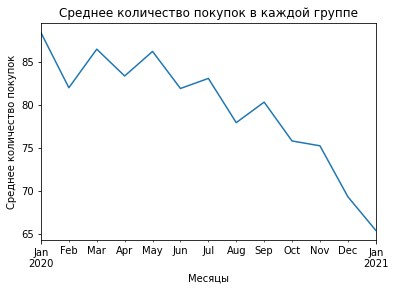

In [72]:
avg_price_month.plot(kind='line')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество покупок')
plt.title('Среднее количество покупок в каждой группе')
plt.show

In [91]:
price_pivot = df.pivot_table(
    index = 'cohort_groups',
    columns = 'cohort_index',
    values = 'price',
    aggfunc = 'mean'    
)

In [92]:
price_pivot

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_groups,,,,,,,,,,,,,,
2020-01,66.257755,78.653211,85.703620,85.226759,88.653379,94.370977,97.807601,96.316036,99.218978,100.952830,99.712869,98.058560,99.275881,104.218134
2020-02,63.371145,74.155747,80.070081,80.547112,82.722132,87.511950,91.208624,96.981919,95.647550,97.868324,100.932642,97.956113,100.582524,NaN
2020-03,66.086298,81.531854,83.483063,85.095062,87.261808,91.035000,96.206958,97.111200,100.483134,101.135969,101.277753,100.545050,NaN,NaN
2020-04,64.088709,76.502006,83.879145,83.643462,83.610678,92.211398,95.769127,99.147795,98.186420,99.575681,102.066116,NaN,NaN,NaN
2020-05,66.214791,80.519156,85.588440,88.873560,90.571946,95.811772,98.069174,98.504560,101.620222,101.477573,NaN,NaN,NaN,NaN
2020-06,63.604034,77.666360,82.942735,84.681206,86.638068,91.229255,96.367304,96.967696,96.918317,NaN,NaN,NaN,NaN,NaN
2020-07,65.081437,79.917746,87.694497,88.874652,91.794836,95.098157,97.198456,102.034314,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,62.752266,76.093364,83.840630,82.988685,86.951694,89.871371,91.136802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,65.489005,80.568631,88.706760,89.949168,90.740835,94.360348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
